# R book 예제를 파이썬으로 구현 및 분석

### 라이브러리 로드 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# ### for korean pont
# # 필요한 패키지와 라이브러리를 가져옴
# import matplotlib as mpl
# import matplotlib.font_manager as fm

# # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
# plt.rcParams["font.size"] = 20
# plt.rcParams["figure.figsize"] = (14,4)

In [3]:
data = pd.read_csv('dongkeun_ICT/csv_data_rbook/example_salary.csv', encoding='euc-kr')

### 데이터 체크 및 데이터 정제

In [4]:
# data value, 컬럼 확인
data.head()

,연령,월급여액 (원),연간특별급여액 (원),근로시간 (시간),근로자수 (명),경력구분,성별
0,-19,1346534,151840,169.5,15042,1년미만,남
1,20-24,1584214,115375,180.1,74251,1년미만,남
2,25-29,1922043,268058,178.0,143338,1년미만,남
3,30-34,2130988,335710,180.8,103585,1년미만,남
4,35-39,2414345,352816,181.4,65385,1년미만,남


In [5]:
# 읽어온 데이터의 급여, 특별급여, 근로시간, 근로자수 컬럼에 '-' 값이 있어 numerical 변수로 치환할 수 없었다. 이를 해결하고자 apply를 활용하여 '-'값을 None으로 대체
data = data.apply(lambda x:x.replace("-",None))

In [6]:
data = data.astype({'월급여액 (원)':'int','연간특별급여액 (원)':'int','근로시간 (시간)':'float','근로자수 (명)':'int'})

In [7]:
# 컬럼, 데이터 개수, 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연령           100 non-null    object 
 1   월급여액 (원)     100 non-null    int64  
 2   연간특별급여액 (원)  100 non-null    int64  
 3   근로시간 (시간)    100 non-null    float64
 4   근로자수 (명)     100 non-null    int64  
 5   경력구분         100 non-null    object 
 6   성별           100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [8]:
# 연령 별로 그룹화 하여 있는 명목 자료의 수를 파악
print("연령 그룹: ",data['연령'].unique())
print("연령 그룹 수: ",len(data['연령'].unique()))

연령 그룹:  ['-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-']
연령 그룹 수:  10


In [9]:
# nan value check
data.isna().sum()

연령             0
월급여액 (원)       0
연간특별급여액 (원)    0
근로시간 (시간)      0
근로자수 (명)       0
경력구분           0
성별             0
dtype: int64

### EDA

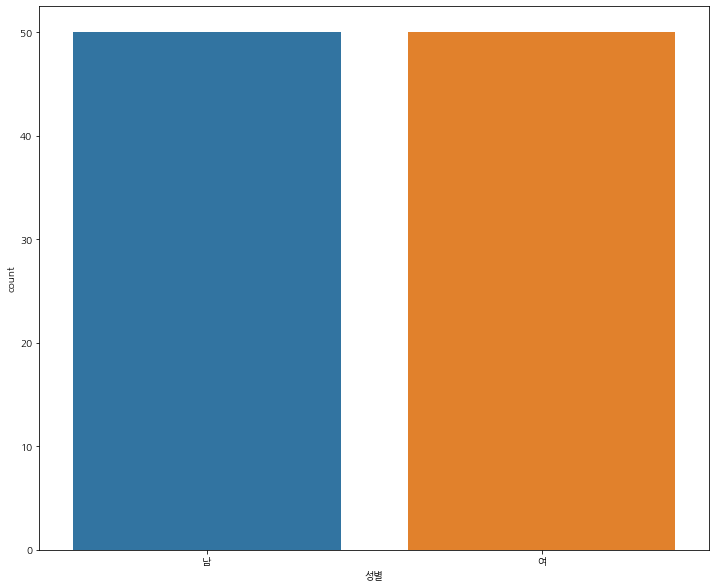

In [10]:
# 주어진 데이터세의 남녀 분포 파악
plt.figure(figsize=(12,10))
plt.rcParams["font.family"] = 'NanumGothic'
sns.countplot(data['성별'])
plt.show()

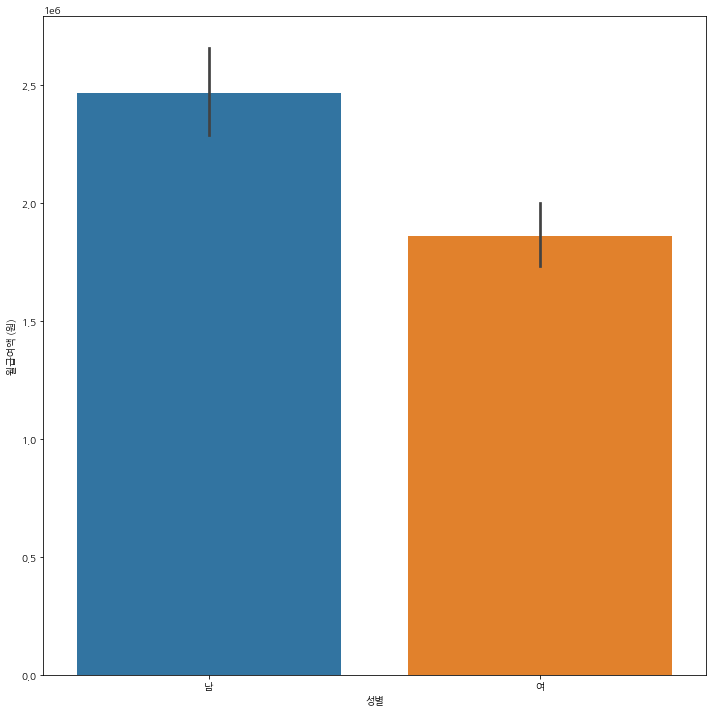

In [11]:
# boxplot을 활용하여 성별 월급 분포를 확인하였다.
plt.figure(figsize=(10,10))

plt.rcParams["font.family"] = 'NanumGothic'
sns.barplot(x = data['성별'], y = data['월급여액 (원)'])
plt.tight_layout()
plt.show()

남성군에서 더많은 범위의 월급을 받는것으로 보인다.

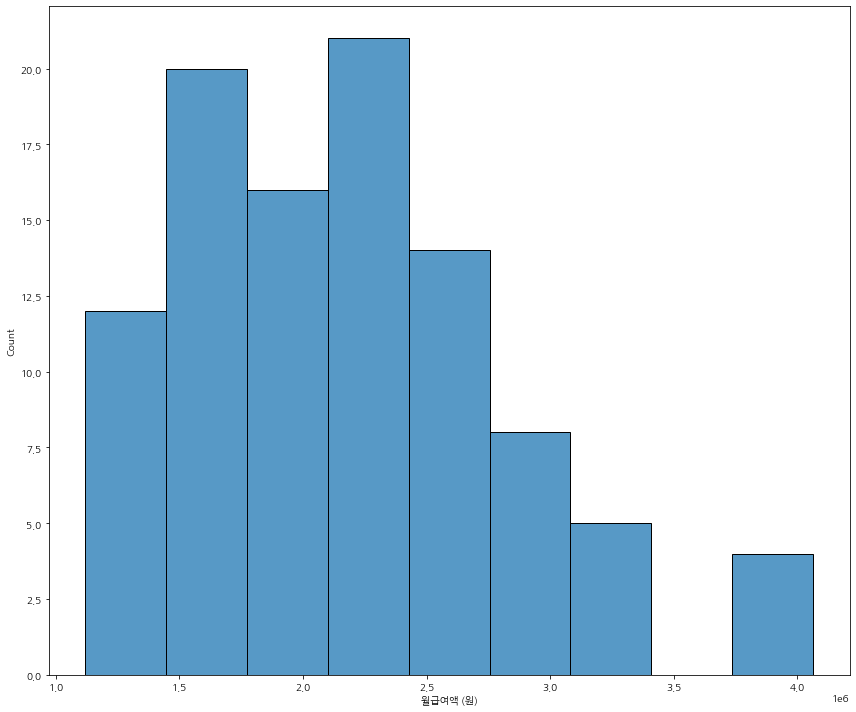

In [12]:
# 급여 분포도 파악
plt.figure(figsize=(12,10))
sns.histplot(data['월급여액 (원)'])
plt.tight_layout()
plt.show()

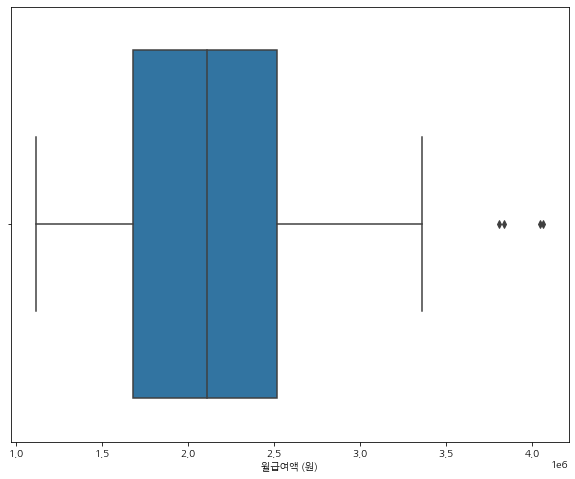

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data['월급여액 (원)'])
plt.show()

In [14]:
print('최소 급여액: ',min(data['월급여액 (원)'])) # 급여액 중 최소값 확인
print('-'*15)
print('최대 급여액: ',max(data['월급여액 (원)'])) # 급여액 중 최댓값 확인

최소 급여액:  1117605
---------------
최대 급여액:  4064286


In [15]:
# 연령별 월급 평균 확인
data_age_sal = data.groupby('연령')['월급여액 (원)'].agg(**{'mean_salary':"median"}).reset_index()

In [16]:
print(data_age_sal)

      연령  mean_salary
0    -19    1633143.0
1  20-24    1823314.5
2  25-29    2181393.5
3  30-34    2382068.5
4  35-39    2569038.5
5  40-44    2470816.5
6  45-49    2449771.0
7  50-54    2222430.0
8  55-59    2118346.5
9    60-    1692431.0


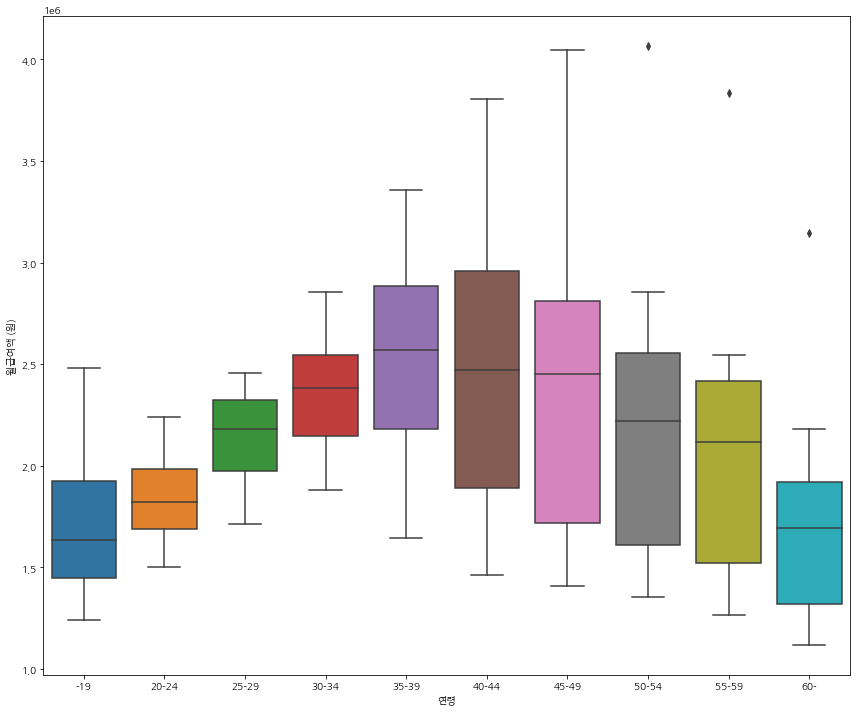

In [17]:
# boxplot을 활용하여 연령별 월급 분포를 체크하였다.
plt.figure(figsize=(12,10))

plt.rcParams["font.family"] = 'NanumGothic'
sns.boxplot(x = data['연령'], y = data['월급여액 (원)'])
plt.tight_layout()
plt.show()


연령이 증가할 수록 더 많은 월급여를 받다 감소하는 경향을 보인다.
이상한 부분은 중간에 월급여가 감소하는 구간에서 outlier가 있는데 사회 통념상 직업군에서 성고하여 임원 혹은 부장까지 진급한
케이스라 생각한다


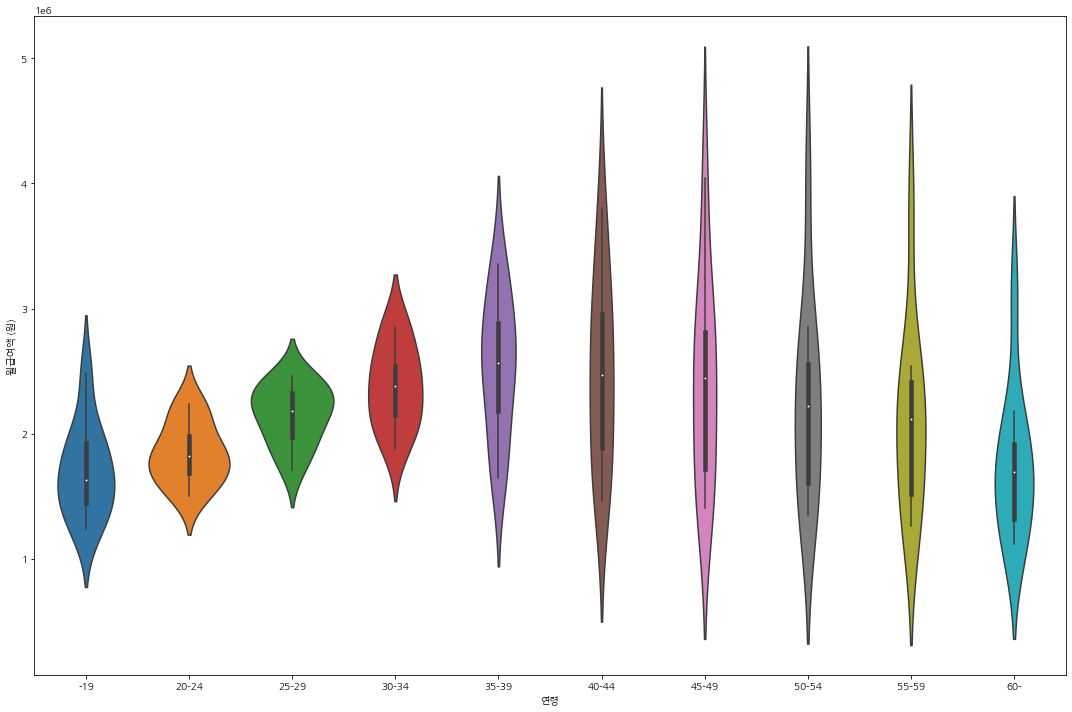

In [18]:
# boxplot을 활용하여 연령별 월급 분포를 체크하였다.
plt.figure(figsize=(15,10))

plt.rcParams["font.family"] = 'NanumGothic'
sns.violinplot(x = data['연령'], y = data['월급여액 (원)'])
plt.tight_layout()
plt.show()

연령이 높아질수록 월급여액의 산포도가 커져서 급여액의 범위가 넓어지는 것을 확인할 수 있었다.

In [19]:
# 월급여를 그룹화 하여 구분
data['월급여 그룹'] = data['월급여액 (원)'].apply(lambda x: '하' if x < 2000000 else('중' if x < 2750000 else ('상')))

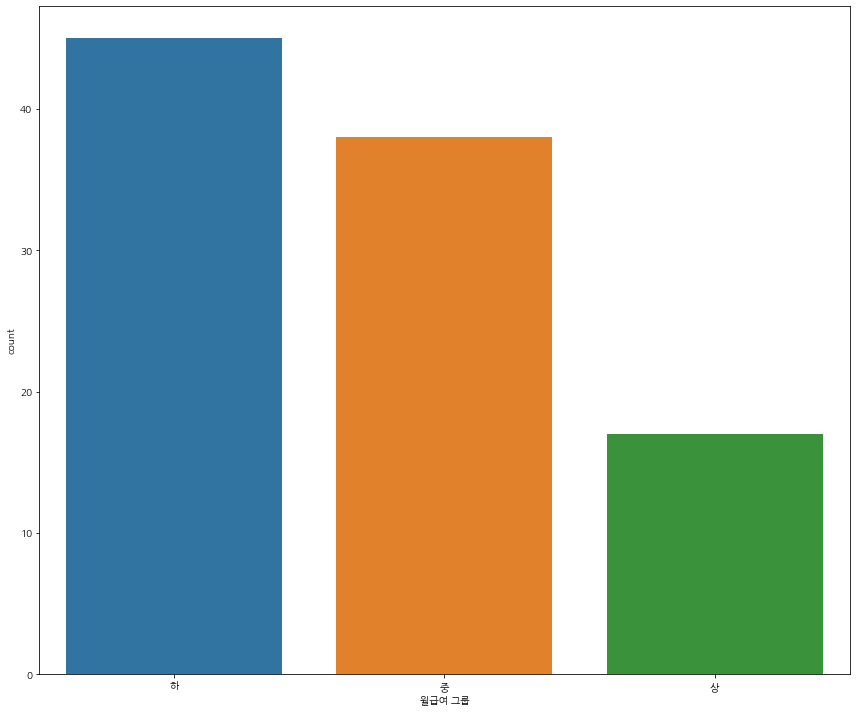

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(data['월급여 그룹'])
plt.tight_layout()
plt.show()

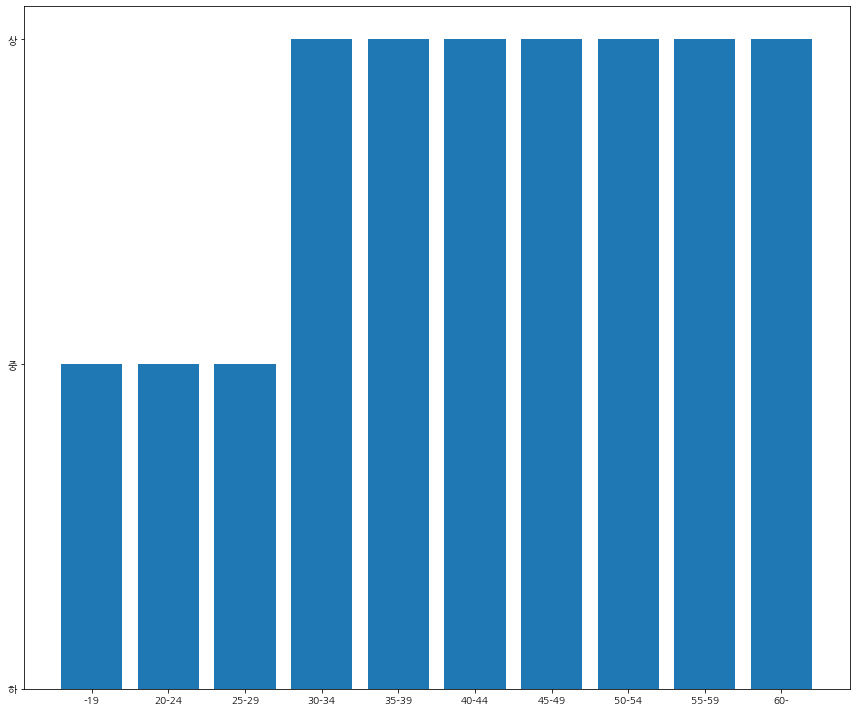

In [21]:
# boxplot을 활용하여 경력 별 월급 분포를 확인하였다.
plt.figure(figsize=(12,10))

plt.rcParams["font.family"] = 'NanumGothic'
plt.bar(data['연령'],data['월급여 그룹'])
plt.tight_layout()
plt.show()

In [22]:
# 경력 별로 그룹화 하여 있는 명목 자료의 수를 파악
print("경력 그룹: ",data['경력구분'].unique())
print("경력 그룹 수: ",len(data['경력구분'].unique()))

경력 그룹:  ['1년미만' '1~3년미만' '3~5년미만' '5~10년미만' '10년이상']
경력 그룹 수:  5


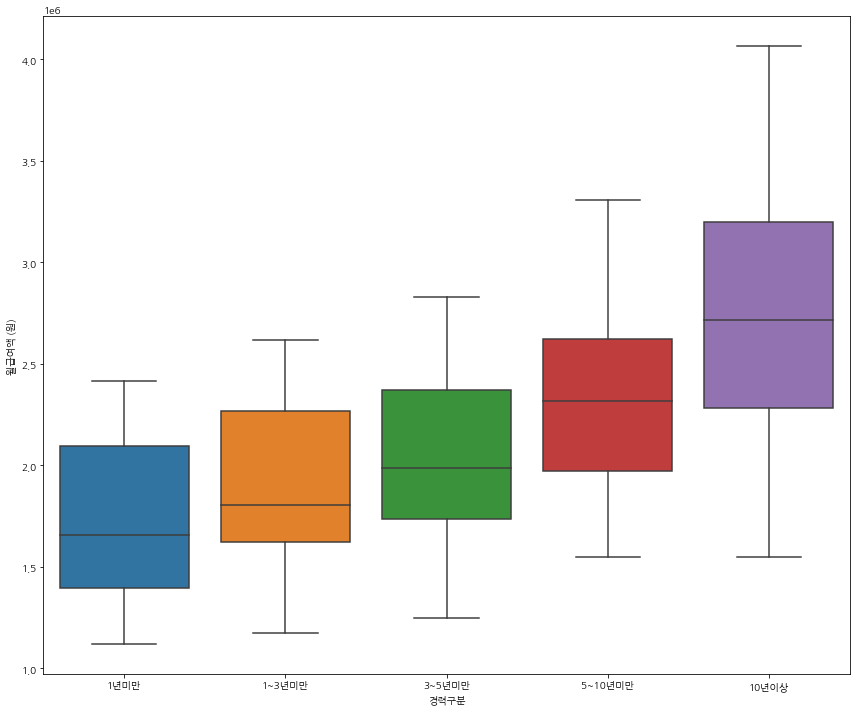

In [23]:
# boxplot을 활용하여 경력 별 월급 분포를 확인하였다.
plt.figure(figsize=(12,10))

plt.rcParams["font.family"] = 'NanumGothic'
sns.boxplot(x = data['경력구분'], y = data['월급여액 (원)'])
plt.tight_layout()
plt.show()

경력이 많아 질수록 월급여액의 산포도가 커지는 것을 확인할 수 있었다.

In [24]:
# 연령과 경력 별 월급 파악

Pivot table을 활용한 데이터 feature grouping
1. pivot_table의 values에 확인하고싶은 데이터를 할당한다
2. pivot_table의 columns에는 확인하고 싶은 데이터를 구분할 행을 할당한다
3. pivot_table의 index에는 확인하고 싶은 데이터를 구분할 열을 할당한다

현재 데이터에서 연령에따른 그리고 경력에 따른 월급을 구분할 수 있다.

In [25]:
# values : 데이터에서 다룰 컬럼
# index : pivot table의 행
# columns : pivot table의 열 
pivot_data = pd.pivot_table(data, index = ['연령','성별'], columns = ['경력구분'], values = ['월급여액 (원)'])

In [26]:
pivot_data

월급여액 (원)                                    
경력구분        10년이상   1~3년미만     1년미만   3~5년미만  5~10년미만
연령    성별                                             
-19   남   1974552  1652158  1346534  1414136  2483000
      여   1548036  1614128  1242026  1809095  1966014
20-24 남   2177278  1792533  1584214  1875815  2239079
      여   1685204  1703021  1501757  1854096  2017535
25-29 남   2458617  2162605  1922043  2329024  2396300
      여   2316881  1926257  1715331  2109702  2200182
30-34 남   2854599  2276212  2130988  2519343  2850779
      여   2551896  2021023  1881262  2201773  2487925
35-39 남   3358258  2619221  2414345  2759442  3154395
      여   2926565  1814147  1643936  2100852  2518856
40-44 남   3806865  2569419  2372214  2827420  3309231
      여   3002440  1622139  1460618  1818857  2106003
45-49 남   4047478  2545490  2354052  2621065  3157228
      여   2874035  1505378  1407778  1661907  1887288
50-54 남   4064286  2298994  2145866  2495111  2857472
      여   2575219  1443682  1356059  1559168  1758735
55-59 남   3835999  2264538  2083157  2153536  2545153
      여   2465273  1382884  1266070  1444562  1751487
60-   남   3144527  1714010  1670852  1759854  1974552
      여   2182715  1172399  1117605  1245540  1548036

In [27]:
pivot_data.shape

(20, 5)

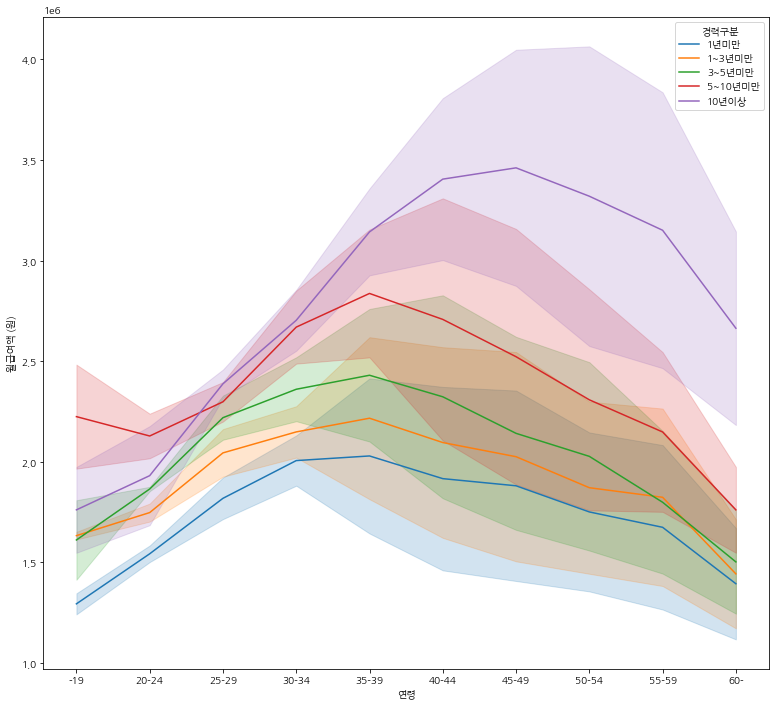

In [28]:
# plt.figure(figsize=(12,10))
# pivot_data.plot.bar()
# plt.show()


plt.figure(figsize=(13,12))
sns.lineplot(data=data, x='연령', y='월급여액 (원)', hue='경력구분')
plt.show()

In [29]:
# values : 데이터에서 다룰 컬럼
# index : pivot table의 행
# columns : pivot table의 열 
pivot_data_2 = pd.pivot_table(data, index = ['연령','성별'], columns = ['경력구분'], values = ['월급여액 (원)'])

In [30]:
pivot_data_2

월급여액 (원)                                    
경력구분        10년이상   1~3년미만     1년미만   3~5년미만  5~10년미만
연령    성별                                             
-19   남   1974552  1652158  1346534  1414136  2483000
      여   1548036  1614128  1242026  1809095  1966014
20-24 남   2177278  1792533  1584214  1875815  2239079
      여   1685204  1703021  1501757  1854096  2017535
25-29 남   2458617  2162605  1922043  2329024  2396300
      여   2316881  1926257  1715331  2109702  2200182
30-34 남   2854599  2276212  2130988  2519343  2850779
      여   2551896  2021023  1881262  2201773  2487925
35-39 남   3358258  2619221  2414345  2759442  3154395
      여   2926565  1814147  1643936  2100852  2518856
40-44 남   3806865  2569419  2372214  2827420  3309231
      여   3002440  1622139  1460618  1818857  2106003
45-49 남   4047478  2545490  2354052  2621065  3157228
      여   2874035  1505378  1407778  1661907  1887288
50-54 남   4064286  2298994  2145866  2495111  2857472
      여   2575219  1443682  1356059  1559168  1758735
55-59 남   3835999  2264538  2083157  2153536  2545153
      여   2465273  1382884  1266070  1444562  1751487
60-   남   3144527  1714010  1670852  1759854  1974552
      여   2182715  1172399  1117605  1245540  1548036

In [31]:
idx_m = data[:]['성별'] == "남"
data_m = data[idx_m]
data_m.head()

,연령,월급여액 (원),연간특별급여액 (원),근로시간 (시간),근로자수 (명),경력구분,성별,월급여 그룹
0,-19,1346534,151840,169.5,15042,1년미만,남,하
1,20-24,1584214,115375,180.1,74251,1년미만,남,하
2,25-29,1922043,268058,178.0,143338,1년미만,남,하
3,30-34,2130988,335710,180.8,103585,1년미만,남,중
4,35-39,2414345,352816,181.4,65385,1년미만,남,중


In [32]:
idx_w = data[:]['성별'] == "여"
data_w = data[idx_w]
data_w.head()

,연령,월급여액 (원),연간특별급여액 (원),근로시간 (시간),근로자수 (명),경력구분,성별,월급여 그룹
50,-19,1242026,430322,151.7,17300,1년미만,여,하
51,20-24,1501757,143708,165.3,109940,1년미만,여,하
52,25-29,1715331,210036,165.4,87237,1년미만,여,하
53,30-34,1881262,180575,162.6,51270,1년미만,여,하
54,35-39,1643936,141326,165.0,40592,1년미만,여,하


In [33]:
## 남자 - 연령별, 경력별 월급
pivot_data_m = pd.pivot_table(data_m, index=['연령'], columns=['경력구분'], values='월급여액 (원)')
pivot_data_m

경력구분,10년이상,1~3년미만,1년미만,3~5년미만,5~10년미만
연령,,,,,
-19,1974552,1652158,1346534,1414136,2483000
20-24,2177278,1792533,1584214,1875815,2239079
25-29,2458617,2162605,1922043,2329024,2396300
30-34,2854599,2276212,2130988,2519343,2850779
35-39,3358258,2619221,2414345,2759442,3154395
40-44,3806865,2569419,2372214,2827420,3309231
45-49,4047478,2545490,2354052,2621065,3157228
50-54,4064286,2298994,2145866,2495111,2857472
55-59,3835999,2264538,2083157,2153536,2545153


In [34]:
## 여자 - 연령별, 경력별 월급
pivot_data_w = pd.pivot_table(data_w, index=['연령'], columns=['경력구분'], values='월급여액 (원)')
pivot_data_w

경력구분,10년이상,1~3년미만,1년미만,3~5년미만,5~10년미만
연령,,,,,
-19,1548036,1614128,1242026,1809095,1966014
20-24,1685204,1703021,1501757,1854096,2017535
25-29,2316881,1926257,1715331,2109702,2200182
30-34,2551896,2021023,1881262,2201773,2487925
35-39,2926565,1814147,1643936,2100852,2518856
40-44,3002440,1622139,1460618,1818857,2106003
45-49,2874035,1505378,1407778,1661907,1887288
50-54,2575219,1443682,1356059,1559168,1758735
55-59,2465273,1382884,1266070,1444562,1751487


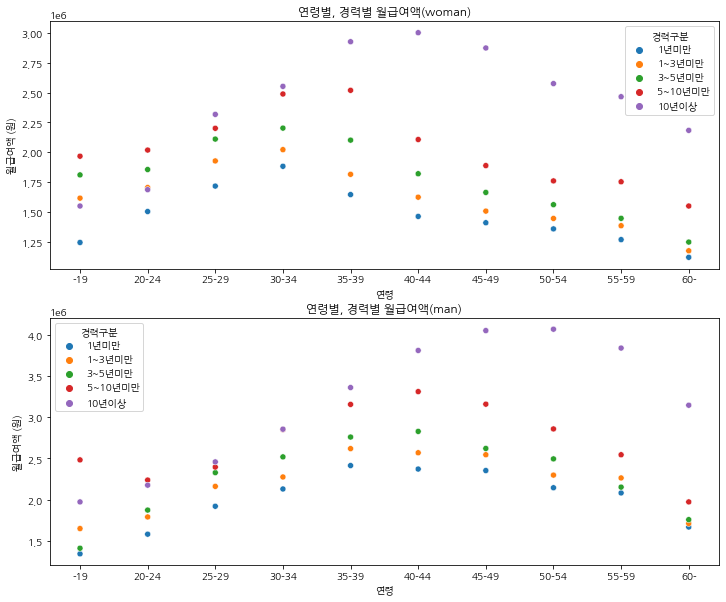

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.scatterplot(data=data_w, x='연령', y='월급여액 (원)', hue='경력구분')
plt.title('연령별, 경력별 월급여액(woman)')

plt.subplot(2,1,2)
sns.scatterplot(data=data_m, x='연령', y='월급여액 (원)', hue='경력구분')
plt.title('연령별, 경력별 월급여액(man)')

plt.show()

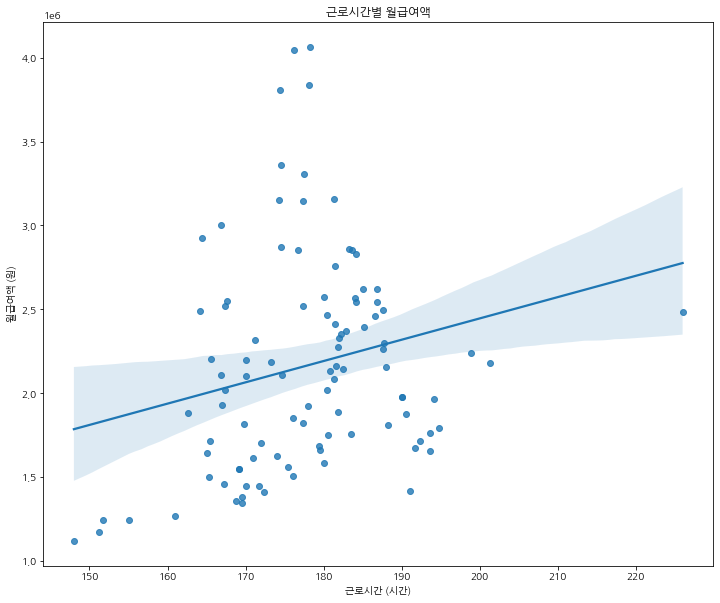

In [36]:
# 근로시간별 월급여 구분
plt.figure(figsize=(12,10))
sns.regplot(data=data, x='근로시간 (시간)', y='월급여액 (원)')
plt.title('근로시간별 월급여액')
plt.show()

근로시간과 월급여액은 상관관계가 낮은것으로 보인다.

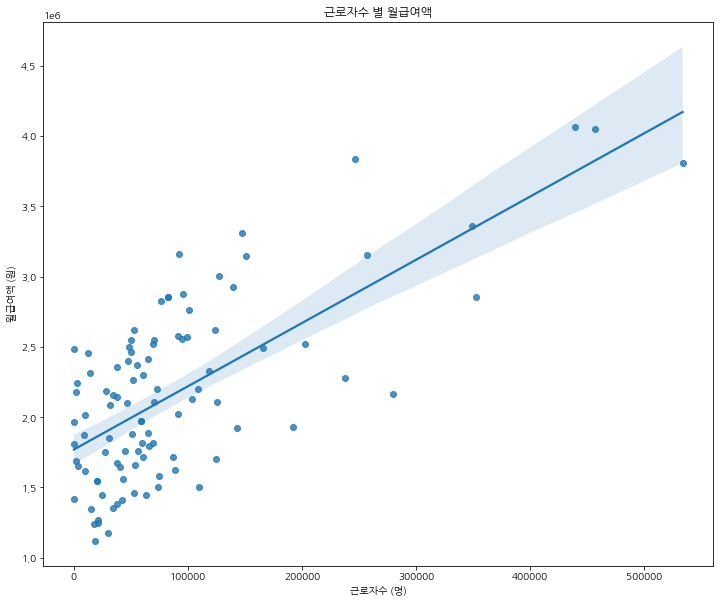

In [37]:
# 근로자수 별 월급여 구분
plt.figure(figsize=(12,10))
sns.regplot(data=data, x='근로자수 (명)', y='월급여액 (원)')
plt.title('근로자수 별 월급여액')
plt.show()

근로자수와 월급여액은 상관관계가 있는 것으로 보인다.

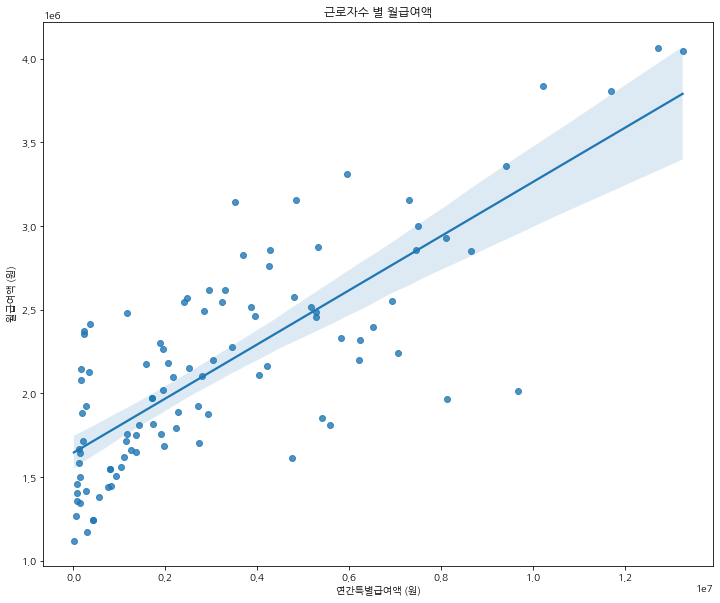

In [38]:
# 근로자수 별 월급여 구분
plt.figure(figsize=(12,10))
sns.regplot(data=data, x='연간특별급여액 (원)', y='월급여액 (원)')
plt.title('근로자수 별 월급여액')
plt.show()

In [39]:
data.corr()

,월급여액 (원),연간특별급여액 (원),근로시간 (시간),근로자수 (명)
월급여액 (원),1.000000,0.783080,0.226021,0.692703
연간특별급여액 (원),0.783080,1.000000,0.070838,0.658457
근로시간 (시간),0.226021,0.070838,1.000000,-0.115511
근로자수 (명),0.692703,0.658457,-0.115511,1.000000


In [40]:
data_m.corr()

,월급여액 (원),연간특별급여액 (원),근로시간 (시간),근로자수 (명)
월급여액 (원),1.000000,0.842722,-0.385365,0.736317
연간특별급여액 (원),0.842722,1.000000,-0.367186,0.799251
근로시간 (시간),-0.385365,-0.367186,1.000000,-0.543396
근로자수 (명),0.736317,0.799251,-0.543396,1.000000


In [41]:
data_w.corr()

,월급여액 (원),연간특별급여액 (원),근로시간 (시간),근로자수 (명)
월급여액 (원),1.000000,0.756011,0.260832,0.508619
연간특별급여액 (원),0.756011,1.000000,0.381858,0.214264
근로시간 (시간),0.260832,0.381858,1.000000,-0.144302
근로자수 (명),0.508619,0.214264,-0.144302,1.000000


여성 근로자의 경우 남성 근로자와 다르게 근로자수와 월급여액의 상관관계가 조금 더 낮은 모습을 보였다.

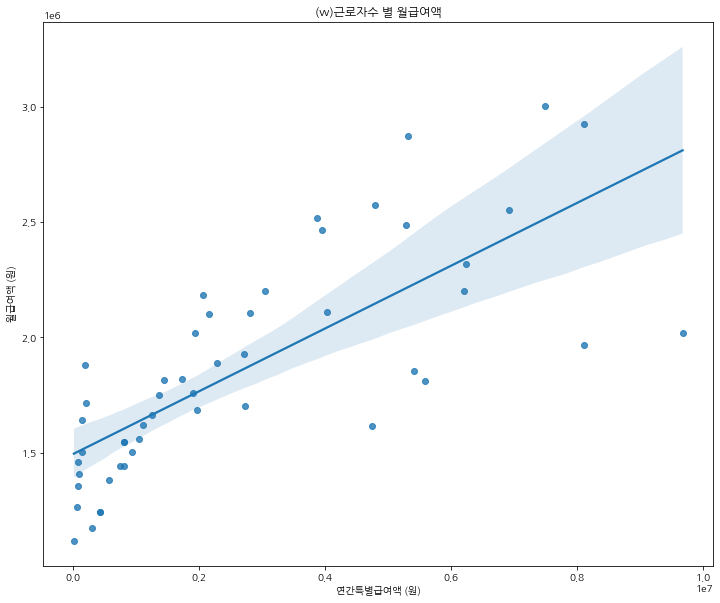

In [42]:
# 근로자수 별 월급여 구분
plt.figure(figsize=(12,10))
sns.regplot(data=data_w, x='연간특별급여액 (원)', y='월급여액 (원)')
plt.title('(w)근로자수 별 월급여액')
plt.show()

In [43]:
train_label = ['연령', '연간특별급여액 (원)', '근로자수 (명)','경력구분']
ans_label = ['월급여 그룹']
train_x = data[train_label]
train_y = data[ans_label]

In [44]:
train_x.head()

,연령,연간특별급여액 (원),근로자수 (명),경력구분
0,-19,151840,15042,1년미만
1,20-24,115375,74251,1년미만
2,25-29,268058,143338,1년미만
3,30-34,335710,103585,1년미만
4,35-39,352816,65385,1년미만


In [45]:
train_x['연령'].unique()

array(['-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-'], dtype=object)

In [46]:
train_x['연령'] = train_x['연령'].apply(lambda x: 0 if x =='-19' else(1 if x== '20-24' else(
2 if x =='25-29' else(3 if x == '30-34' else(4 if x == '35-39' else(5 if x == '40-44' else(6 if x == '40-44'else(
7 if x =='45-49' else(8 if x == '50-54' else(9 if x == '55-59' else(10)))))))))))

In [47]:
train_x['경력구분'].unique()

array(['1년미만', '1~3년미만', '3~5년미만', '5~10년미만', '10년이상'], dtype=object)

In [48]:
train_x['경력구분'] = train_x['경력구분'].apply(lambda x: '00001' if x =='1년미만' else('00010' if x=='1~3년미만' else('00100' if x=='3~5년미만' else(
'01000' if x=='5~10년미만' else('10000')))))

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(train_x, train_y,test_size=0.2, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

rf = RandomForestClassifier(n_estimators = 200, random_state = 1)
dt = DecisionTreeClassifier(random_state = 2,max_features='auto',criterion='entropy')
svm = SVC(kernel='rbf', gamma='auto')
mlpc = MLPClassifier(alpha=1, max_iter=1000)

vot_cf = VotingClassifier(estimators = [('rf',rf),('dt',dt),('svm',svm),('mlpc',mlpc)],voting='hard')
vot_cf = vot_cf.fit(x_train,y_train)

In [70]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,vot_cf.predict(x_test)))

0.85
